## Adult Income Prediction
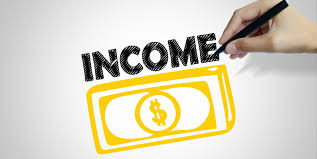

#### About dataset:
Also known as the Census Income dataset, is a popular dataset often used for machine learning and data analysis tasks. It is a publicly available dataset that contains information about individuals from the 1994 US Census Bureau database. The dataset is commonly used for classification tasks, where the goal is to predict whether an individual's income exceeds a certain threshold (e.g., $50,000 per year).

Here are some key features and characteristics of the UCI Adult dataset:


1. age: continuous.

2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

3. fnlwgt: continuous.

4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

5. education-num: continuous.

6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

10. sex: Female, Male.

11. capital-gain: continuous.

12. capital-loss: continuous.

13. hours-per-week: continuous.

14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.


## Objectives:

1. Target Variable: The target variable is "income" and represents whether an individual's income is greater than $50,000 per year ("<=50K" or ">50K").

2. Features: The dataset consists of various demographic, socioeconomic, and employment-related attributes of individuals, including age, education level, work-class, marital status, occupation, relationship, race, gender, capital gains, capital losses, hours worked per week, and native country.

3. Data Format: The dataset is available in a tabular format, typically as a comma-separated values (CSV) file.

4. Size: The dataset contains approximately 32,000 instances, with a balanced distribution of positive and negative instances (income >50K and income <=50K).

5. Missing Values: The dataset may contain missing values, which need to be handled appropriately during data preprocessing.

6. Usage: The UCI Adult dataset is commonly used for tasks such as classification, data mining, and evaluating machine learning algorithms' performance. Researchers and practitioners often utilize this dataset to explore various socioeconomic and demographic factors' influence on income levels.

7. Data Source: The dataset was derived from the 1994 US Census Bureau database and made available by the UCI Machine Learning Repository.

## Importing nassaries liebries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings("ignore")

## Load dataset

In [2]:
df = pd.read_csv(r"C:\Users\Dell\Downloads\adult\adultdataset.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
# check dataset size
df.shape

(48842, 15)

In [4]:
# check duplicated values
df.duplicated().sum()

52

In [5]:
# delete duplicated values 
df = df.drop_duplicates()
df.duplicated().sum()

0

In [6]:
# check num values
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [7]:
# check information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48790 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48790 non-null  int64 
 1   workclass       48790 non-null  object
 2   fnlwgt          48790 non-null  int64 
 3   education       48790 non-null  object
 4   education-num   48790 non-null  int64 
 5   marital-status  48790 non-null  object
 6   occupation      48790 non-null  object
 7   relationship    48790 non-null  object
 8   race            48790 non-null  object
 9   sex             48790 non-null  object
 10  capital-gain    48790 non-null  int64 
 11  capital-loss    48790 non-null  int64 
 12  hours-per-week  48790 non-null  int64 
 13  native-country  48790 non-null  object
 14  Income          48790 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [8]:
# check the datase describe it is statical tecknique
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48790.0,38.652798,13.708493,17.0,28.0,37.0,48.00,90.0
fnlwgt,48790.0,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
education-num,48790.0,10.078807,2.570046,1.0,9.0,10.0,12.00,16.0
capital-gain,48790.0,1080.217688,7455.905921,0.0,0.0,0.0,0.00,99999.0
capital-loss,48790.0,87.595573,403.209129,0.0,0.0,0.0,0.00,4356.0
hours-per-week,48790.0,40.425886,12.392729,1.0,40.0,40.0,45.00,99.0


In [9]:
# check the datase describe it is statical tecknique
df.describe(include="object").T

,count,unique,top,freq
workclass,48790,9,Private,33860
education,48790,16,HS-grad,15770
marital-status,48790,7,Married-civ-spouse,22366
occupation,48790,15,Prof-specialty,6165
relationship,48790,6,Husband,19703
race,48790,5,White,41714
sex,48790,2,Male,32614
native-country,48790,42,United-States,43792
Income,48790,2,<=50K,37109


## Data visualazation

In [10]:
# find the catetical colums
cat = df.describe(include="object").columns
cat

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Income'],
      dtype='object')

In [11]:
# find the numbrical columns
num = df.describe().columns
num

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

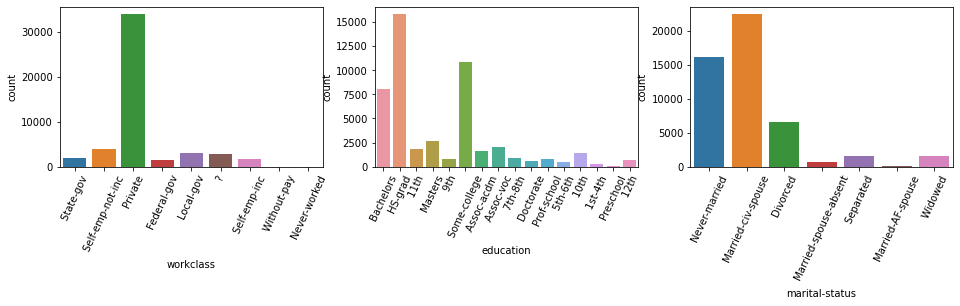

In [12]:
# visulation columns wise using seaborn libries
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.countplot(data=df,x="workclass")
plt.xticks(rotation=65)
plt.subplot(3,3,2)
sns.countplot(data=df,x="education")
plt.xticks(rotation=65)
plt.subplot(3,3,3)
sns.countplot(data=df,x="marital-status")
plt.xticks(rotation=65)
plt.show()


## Observation:
1. insight of the workclass column: mostly the pivate sector are adult peploe showing as per the data.
2. insight of the education column: mostly the people are some-college student and Hs-grad.
1. insight of the marital_status column: mostly the newver_married and married-civ_spouse showing.

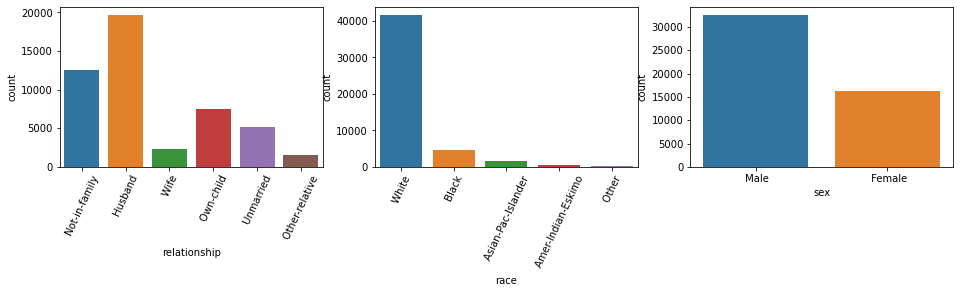

In [13]:
# visulation columns wise using seaborn libries
plt.figure(figsize=(16,10))
plt.subplot(3,3,1)
sns.countplot(data=df,x="relationship")
plt.xticks(rotation=65)
plt.subplot(3,3,2)
sns.countplot(data=df,x="race")
plt.xticks(rotation=65)
plt.subplot(3,3,3)
sns.countplot(data=df,x="sex")
plt.show()

## Observation:
1. insight of the ralationship column: most peaple are husband higher  count around 20000 above.
2. insight of the race column: most peaple are white.
3. insight of the sex column: compere to male aur female grther than males around 30000 above.

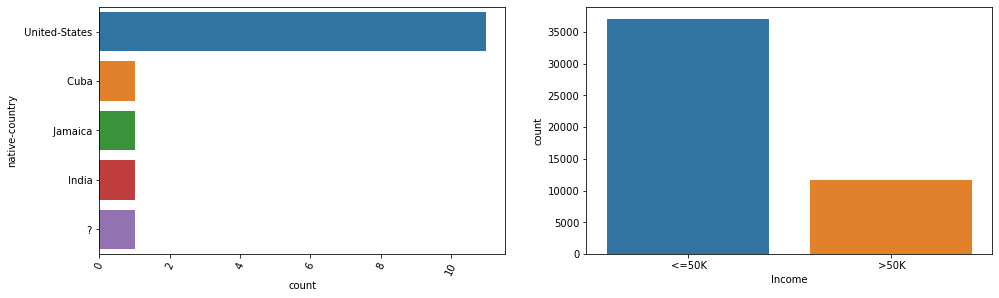

In [14]:
# visulation columns wise using seaborn libries
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.countplot(data=df[:15],y="native-country")
plt.xticks(rotation=65)
plt.subplot(2,2,2)
sns.countplot(data=df,x="Income")
plt.show()

## Observation:
1. mostly are the people in US.
2. most pepole income are lower then 50k.

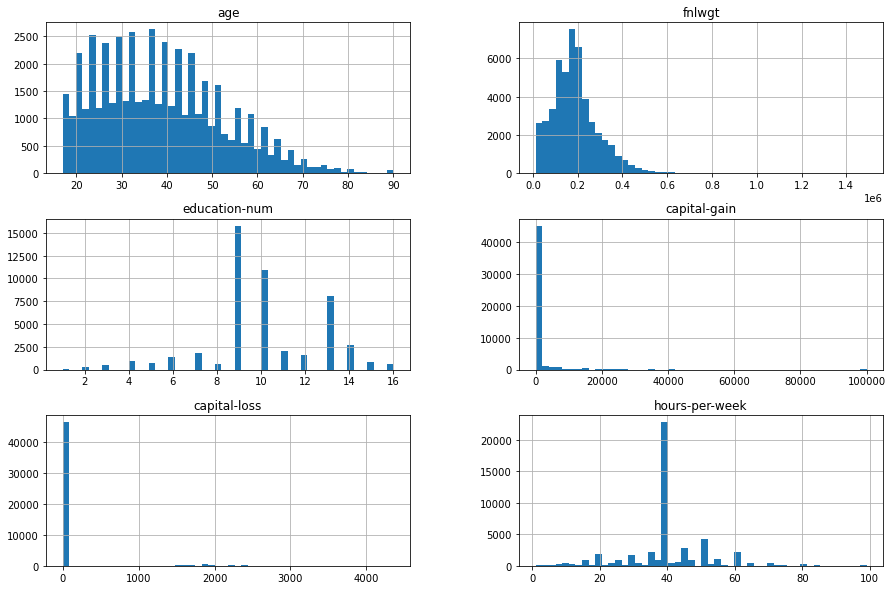

In [15]:
## numbrical values visualtion to used hitogram plot it is help to continies values find insight count wise
df[num].hist(bins=50,figsize=(15,10))
plt.show()

## Data Preprocessing

In [16]:
# catarical columns lable encoding tecknies conver numbric values
from sklearn.preprocessing import OrdinalEncoder

incode = OrdinalEncoder()

df[cat] = incode.fit_transform(df[cat])

In [17]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,7.0,77516,9.0,13,4.0,1.0,1.0,4.0,1.0,2174,0,40,39.0,0.0
1,50,6.0,83311,9.0,13,2.0,4.0,0.0,4.0,1.0,0,0,13,39.0,0.0
2,38,4.0,215646,11.0,9,0.0,6.0,1.0,4.0,1.0,0,0,40,39.0,0.0
3,53,4.0,234721,1.0,7,2.0,6.0,0.0,2.0,1.0,0,0,40,39.0,0.0
4,28,4.0,338409,9.0,13,2.0,10.0,5.0,2.0,0.0,0,0,40,5.0,0.0


In [18]:
df["Income"].value_counts()

0.0    37109
1.0    11681
Name: Income, dtype: int64

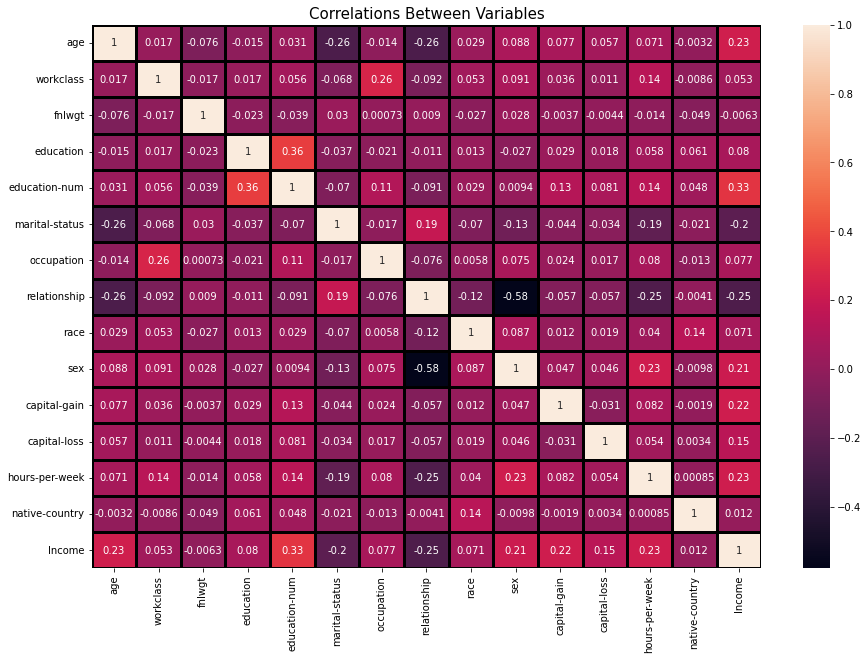

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linecolor="black",linewidths=3)
plt.title("Correlations Between Variables",size=15)
plt.show()

## observation:
1. Insight, the correlation is. The positive correlation shows is 0.02 to 0.1.

2. Insight, the correlation is. The negative correlation. It ranges from -0.02 to -0.04.

## x,y split

In [20]:
x = df.iloc[:,:-1]
y = df["Income"]

## train_test_split

In [21]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=43)
print(xtrain.shape)
print(xtest.shape)

(34153, 14)
(14637, 14)


## Feature scaling

In [22]:
## convert the all numbrical value 0 to 1 range
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

xtrain = pd.DataFrame(scaler.fit_transform(xtrain),columns=xtrain.columns)
xtest = pd.DataFrame(scaler.transform(xtest),columns=xtest.columns)

In [23]:
xtrain.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.136986,0.000,0.072772,1.000000,0.600000,0.000000,0.000000,0.8,0.0,0.0,0.0,0.0,0.397959,0.95122
1,0.671233,0.625,0.064502,0.733333,0.533333,0.333333,0.857143,0.0,1.0,1.0,0.0,0.0,0.602041,0.95122
2,0.342466,0.500,0.063509,0.600000,0.800000,0.333333,0.714286,0.0,1.0,1.0,0.0,0.0,0.397959,0.95122
3,0.246575,0.500,0.126515,0.066667,0.400000,0.833333,1.000000,0.2,1.0,1.0,0.0,0.0,0.908163,0.95122
4,0.013699,0.875,0.280919,0.733333,0.533333,0.666667,0.071429,0.6,0.5,0.0,0.0,0.0,0.193878,0.95122


In [24]:
xtest.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.287671,0.50,0.071386,0.800000,0.866667,0.333333,0.285714,0.0,1.0,1.0,0.076881,0.0,0.602041,0.95122
1,0.547945,0.75,0.159021,0.733333,0.533333,0.333333,0.857143,0.0,1.0,1.0,0.000000,0.0,0.724490,0.95122
2,0.136986,0.50,0.039069,1.000000,0.600000,0.666667,0.571429,0.2,1.0,1.0,0.000000,0.0,0.397959,0.95122
3,0.000000,0.50,0.217181,0.733333,0.533333,0.666667,0.571429,0.6,1.0,0.0,0.000000,0.0,0.397959,0.95122
4,0.520548,0.50,0.039106,0.800000,0.866667,0.333333,0.714286,0.0,1.0,1.0,0.000000,0.0,0.397959,0.95122


### Model Bulding by CNN

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping

In [26]:
nn = Sequential()

nn.add(Dense(64,input_dim=xtrain.shape[1],activation="relu"))
nn.add(Dense(32,activation="relu"))
nn.add(Dense(1,activation="sigmoid"))

In [27]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,073
Trainable params: 3,073
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Stopping training when a monitored metric stops improving significantly.
early_stop = EarlyStopping(monitor="val_loss",patience=10)

In [29]:
#Configuring parameters and settings for optimization, loss, metrics, and other options in a deep learning model.
nn.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [30]:
hist = nn.fit(xtrain,ytrain,validation_split=0.2,epochs=100,callbacks=[early_stop])

Epoch 1/100
854/854 [==============================] - 2s 2ms/step - loss: 0.4275 - accuracy: 0.7992 - val_loss: 0.3605 - val_accuracy: 0.8315
Epoch 2/100
854/854 [==============================] - 1s 1ms/step - loss: 0.3522 - accuracy: 0.8370 - val_loss: 0.3374 - val_accuracy: 0.8457
Epoch 3/100
854/854 [==============================] - 1s 2ms/step - loss: 0.3385 - accuracy: 0.8415 - val_loss: 0.3293 - val_accuracy: 0.8457
Epoch 4/100
854/854 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8455 - val_loss: 0.3280 - val_accuracy: 0.8486
Epoch 5/100
854/854 [==============================] - 1s 1ms/step - loss: 0.3303 - accuracy: 0.8464 - val_loss: 0.3244 - val_accuracy: 0.8504
Epoch 6/100
854/854 [==============================] - 1s 1ms/step - loss: 0.3311 - accuracy: 0.8451 - val_loss: 0.3269 - val_accuracy: 0.8458
Epoch 7/100
854/854 [==============================] - 1s 1ms/step - loss: 0.3291 - accuracy: 0.8457 - val_loss: 0.3284 - val_accuracy: 0.8456

Epoch 58/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3069 - accuracy: 0.8559 - val_loss: 0.3165 - val_accuracy: 0.8558
Epoch 59/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3060 - accuracy: 0.8552 - val_loss: 0.3154 - val_accuracy: 0.8536
Epoch 60/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3058 - accuracy: 0.8555 - val_loss: 0.3148 - val_accuracy: 0.8560
Epoch 61/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3060 - accuracy: 0.8546 - val_loss: 0.3145 - val_accuracy: 0.8546
Epoch 62/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3055 - accuracy: 0.8558 - val_loss: 0.3167 - val_accuracy: 0.8538
Epoch 63/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3052 - accuracy: 0.8558 - val_loss: 0.3163 - val_accuracy: 0.8527
Epoch 64/100
854/854 [==============================] - 3s 3ms/step - loss: 0.3042 - accuracy: 0.8569 - val_loss: 0.3185 - val_accuracy:

# Visualazation learning curve

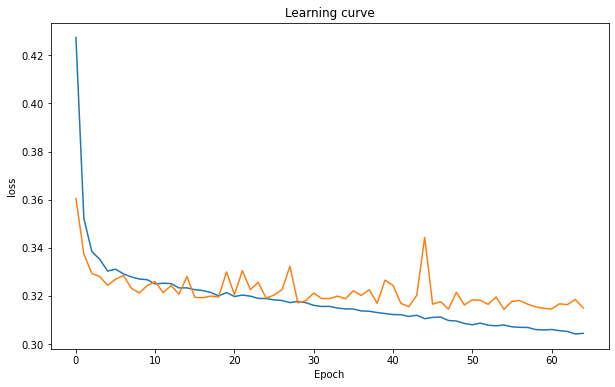

In [31]:
plt.figure(figsize=(10,6))
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.title("Learning curve")
plt.show()

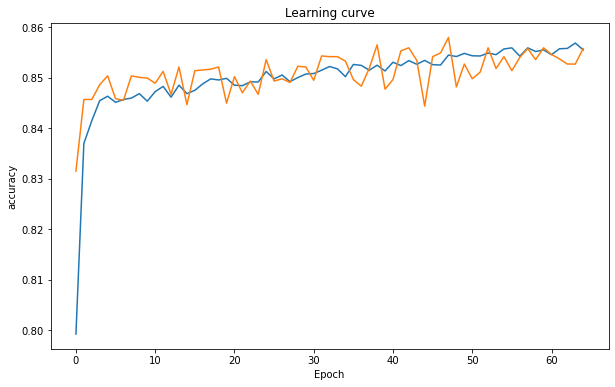

In [32]:
plt.figure(figsize=(10,6))
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.xlabel("Epoch")
plt.ylabel("accuracy")
plt.title("Learning curve")
plt.show()

## Evaluate

In [33]:
nn.evaluate(xtrain,ytrain)

1068/1068 [==============================] - 2s 2ms/step - loss: 0.3026 - accuracy: 0.8578


[0.3026061952114105, 0.8578456044197083]

In [34]:
nn.evaluate(xtest,ytest)

458/458 [==============================] - 1s 2ms/step - loss: 0.3132 - accuracy: 0.8525


[0.31320035457611084, 0.8524971008300781]

## predication

In [35]:
train_pred = nn.predict(xtrain)
test_pred = nn.predict(xtest)

458/458 [==============================] - 1s 2ms/step


In [36]:
train_pred[:5]

array([[1.6630167e-03],
       [3.5656452e-01],
       [7.0493317e-01],
       [7.1545050e-02],
       [1.5047992e-05]], dtype=float32)

In [37]:
test_pred[:5]

array([[9.9181694e-01],
       [3.5856202e-01],
       [1.2191806e-02],
       [1.9910224e-04],
       [8.0501771e-01]], dtype=float32)

In [38]:
# convert prediction values like 0 to 1
train_pred_class = []

for i in train_pred:
    if i >= 0.5:
        train_pred_class.append(1)
    else:
        train_pred_class.append(0)

In [39]:
train_pred_class[:5]

[0, 0, 1, 0, 0]

In [40]:
# convert prediction values like 0 to 1
test_pred_class = []

for i in test_pred:
    if i >= 0.5:
        test_pred_class.append(1)
    else:
        test_pred_class.append(0)

In [41]:
test_pred_class[:5]

[1, 0, 0, 0, 1]

## sklearn metrix

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score

print(confusion_matrix(ytest,test_pred_class))
print(classification_report(ytest,test_pred_class))

[[10493   658]
 [ 1501  1985]]
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91     11151
         1.0       0.75      0.57      0.65      3486

    accuracy                           0.85     14637
   macro avg       0.81      0.76      0.78     14637
weighted avg       0.85      0.85      0.85     14637



<AxesSubplot:>

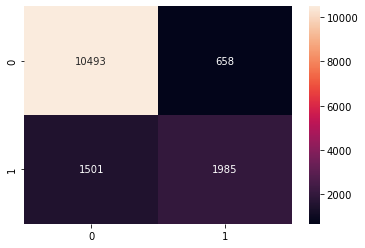

In [43]:
sns.heatmap(confusion_matrix(ytest,test_pred_class),annot=True,fmt="d")

In [44]:
print("Train_accuracy_score:",round(accuracy_score(ytrain,train_pred_class),2))
print("Test_accuracy_score:",round(accuracy_score(ytest,test_pred_class),2))

Train_accuracy_score: 0.86
Test_accuracy_score: 0.85



## roc_auc_score

In [45]:
print("roc_auc_score:",round(roc_auc_score(ytrain,train_pred_class),2))
print("roc_auc_score:",round(roc_auc_score(ytest,test_pred_class),2))

roc_auc_score: 0.77
roc_auc_score: 0.76
